# Utilities

Import libraries

In [1]:
# Libary imports <R>
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
from rpy2.robjects.packages import importr
from rpy2.robjects.conversion import localconverter

# Library imports <Python>
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import statsmodels.api as sm
# from scipy.stats import ttest_ind
# import statsmodels.formula.api as smf
# from sklearn.metrics import mean_squared_error
# from sklearn.linear_model import Ridge, Lasso
# from sklearn.model_selection import GridSearchCV
# from sklearn.preprocessing import StandardScaler

print("Packages imported successfully.")

Error importing in API mode: ImportError('On Windows, cffi mode "ANY" is only "ABI".')
Trying to import in ABI mode.


Packages imported successfully.


Dataset sources:

In [ ]:
# alr4 = importr('alr4')
# print("alr4 package imported successfully.")
# islr = importr('ISLR')
# print("ISLR package imported successfully.")

alr4 package imported successfully.
ISLR package imported successfully.


# Problem 6

**Explanation of Problem 6: Sex Discrimination (Data file: salary)**

- Problem 6 is a multiple linear regression. 
- The exercise focused on analyzing potential sex discrimination in the salaries of faculty at a small Midwestern college.
- The goal is to use regression analysis to model <u>academic salary</u> based on several <u>faculty characteristics</u> and to investigate if there is a statistically <u>significant difference in salaries between males and females</u>

In [3]:
# load the salary data from the alr4 package
# ro.r['data']('salary', package='alr4')

# with localconverter(ro.default_converter + pandas2ri.converter):
#     salary_df = ro.r['salary']

# print(salary_df.head())
# print(salary_df.info())

salary_df = pd.read_csv('./datasets/salary_data.csv')
salary_df.head()

,degree,rank,sex,year,ysdeg,salary
0,Masters,Prof,Male,25,35,36350
1,Masters,Prof,Male,13,22,35350
2,Masters,Prof,Male,10,23,28200
3,Masters,Prof,Female,7,27,26775
4,PhD,Prof,Male,19,30,33696


In [4]:
# data info
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   degree  52 non-null     object
 1   rank    52 non-null     object
 2   sex     52 non-null     object
 3   year    52 non-null     int64 
 4   ysdeg   52 non-null     int64 
 5   salary  52 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 2.6+ KB


In [ ]:
# save dataframe to csv
# salary_df.to_csv('./datasets/salary_data.csv', index=False)

The data set, salary, includes the following variables:
 - `salary`: Academic year salary in dollars (Response variable).
 - `sex`: A factor with levels Male and Female.   
 - `degree`: Highest degree (e.g., Masters, PhD).
 - `rank`: Faculty rank (e.g., Prof).
 - `year`: Years in the current rank.
 - `ysdeg`: Years since highest degree.

## 1. Get appropriate graphical summaries of the data and discuss the graphs.

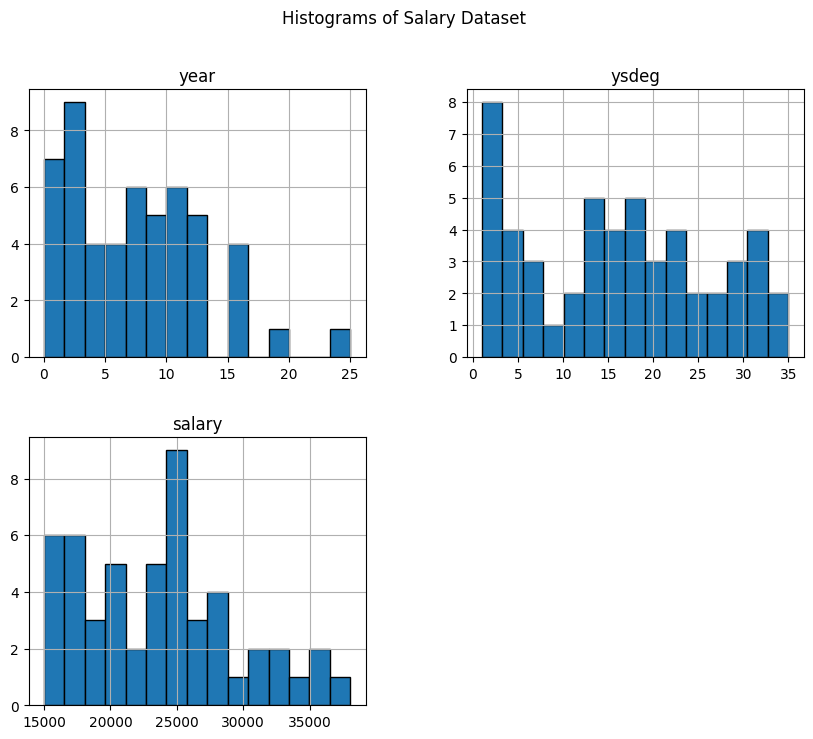

In [7]:
# histogram
salary_df.hist(bins=15, figsize=(10, 8), edgecolor='black')
plt.suptitle("Histograms of Salary Dataset")
plt.show()

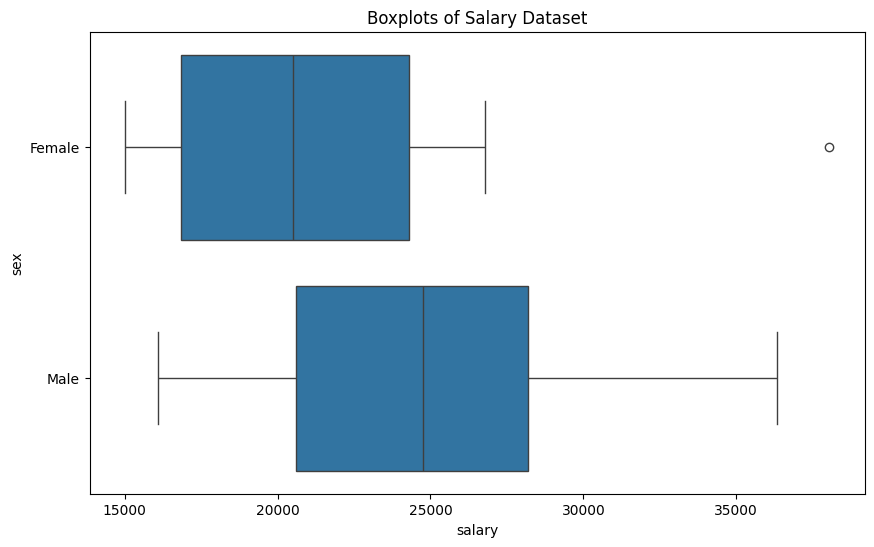

In [ ]:
# boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=salary_df, x='salary', y='sex', orient='h')
plt.title("Boxplots of Salary Dataset")
plt.show()

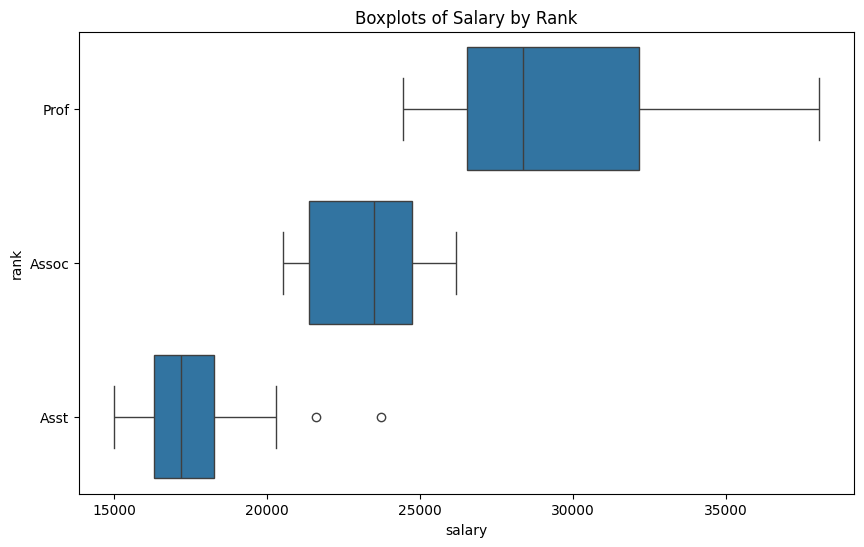

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=salary_df, x='salary', y='rank', orient='h')
plt.title("Boxplots of Salary by Rank")
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=salary_df, x='salary', y='sex', orient='h')
plt.title("Boxplots of Salary by ")
plt.show()

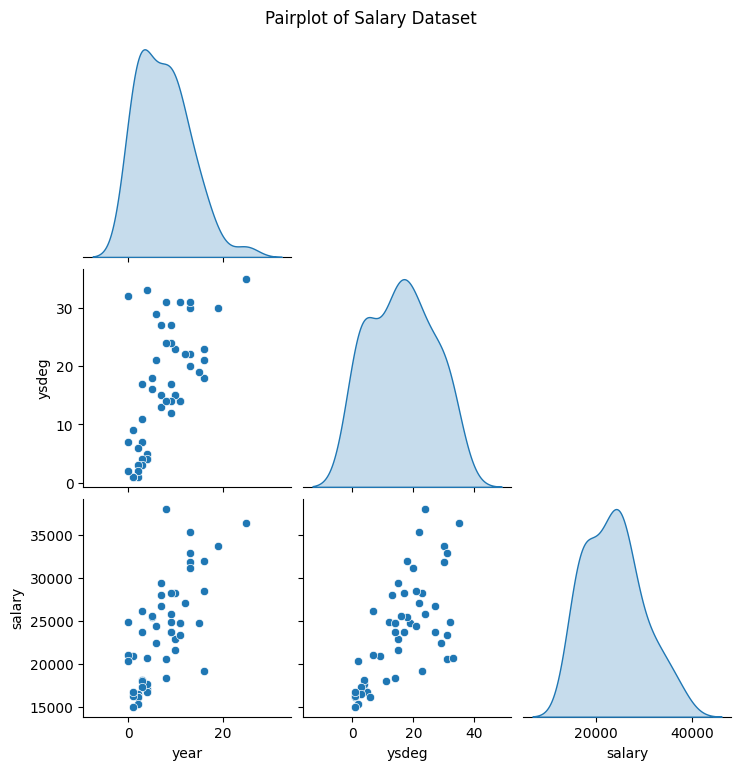

In [ ]:
# pairplot
sns.pairplot(salary_df, diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Salary Dataset", y=1.02)
plt.show()

## 2. Test the hypothesis that the mean salary for men and women is the same. What alternative hypothesis do you think is appropriate?

Hypotheses:
Null Hypothesis (H₀): The mean salary for men and women is the same.

$H_0: \mu_{\text{Male}} = \mu_{\text{Female}}$

Alternative Hypothesis (H₁): The mean salary for men and women is different.

$H_1: \mu_{\text{Male}} \neq \mu_{\text{Female}}$

Alternatively, if you suspect that one gender earns more than the other, you can use a one-tailed test:

$H_1: \mu_{\text{Male}} > \mu_{\text{Female}}$ (if you suspect men earn more)

$H_1: \mu_{\text{Male}} < \mu_{\text{Female}}$ (if you suspect women earn more)

In [7]:
# Separate the salaries by gender
male_salaries = salary_df[salary_df['sex'] == 'Male']['salary']
female_salaries = salary_df[salary_df['sex'] == 'Female']['salary']

# Perform a two-sample t-test
t_stat, p_value = ttest_ind(male_salaries, female_salaries, equal_var=False)

# Print the results
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in mean salaries between men and women.")
else:
    print("Fail to reject the null hypothesis: No significant difference in mean salaries between men and women.")

T-statistic: 1.7744380049367063
P-value: 0.09009405709468926
Fail to reject the null hypothesis: No significant difference in mean salaries between men and women.


## 3. Assuming no interactions between sex and the other predictors, obtain a 95% confidence interval for the difference in salary between males and females.

In [6]:
# Ensure 'sex' is a categorical variable
salary_df['sex'] = salary_df['sex'].astype('category')

# Optional: Set 'Female' as the reference level
salary_df['sex'] = salary_df['sex'].cat.reorder_categories(['Female', 'Male'], ordered=True)

# Fit a linear regression model with salary as the response and sex as the predictor
model = smf.ols('salary ~ sex', data=salary_df).fit()

# Get the confidence interval for the coefficient of sex
conf_int = model.conf_int(alpha=0.05)  # 95% confidence interval
print(conf_int)  # Inspect the confidence intervals to find the correct label

# Adjust the label based on the output of conf_int
sex_diff_ci = conf_int.loc['sex[T.Male]']  # Update this if the label differs

# Print the results
print("95% Confidence Interval for the difference in salary between males and females:")
print(sex_diff_ci)

                        0             1
Intercept    18253.263379  24461.022335
sex[T.Male]   -291.257020   6970.550253
95% Confidence Interval for the difference in salary between males and females:
0    -291.257020
1    6970.550253
Name: sex[T.Male], dtype: float64


## 4. Model Re-evaluation (Excluding rank)

In [17]:
# Fit a linear regression model excluding the variable 'rank'
model_no_rank = smf.ols('salary ~ sex + degree + year + ysdeg', data=salary_df).fit()

# Summarize the model
print(model_no_rank.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     20.11
Date:                Tue, 09 Dec 2025   Prob (F-statistic):           1.05e-09
Time:                        01:12:09   Log-Likelihood:                -499.00
No. Observations:                  52   AIC:                             1008.
Df Residuals:                      47   BIC:                             1018.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       1.59e+04   1259.866     12.618

After excluding the rank variable (which may be “tainted” by discrimination in promotion), we find:
- There is no statistically significant salary difference between males and females when controlling for degree, years in rank, and years since degree (p = 0.332).
- If the court’s concern is that rank may reflect past discrimination, then this model suggests there is no significant gender-based salary discrimination when considering only degree, year, and ysdeg

# Problem 7

**About the Dataset:**

The `Auto` dataset in R:

- Contains information of various car models.

- Includes variables such as miles per gallon (mpg), number of cylinders, displacement, horsepower, weight, acceleration, year of manufacture, origin, and car name.

**Dataset Details**

- Observations: 392 vehicles (rows).
- Variables: 9 attributes (columns). 

**Variables Description**

The 9 variables in the Auto dataset are:
- `mpg`: miles per gallon (quantitative)
- `cylinders`: number of cylinders (qualitative, though can be treated as quantitative in some analyses)
- `displacement`: engine displacement (cubic inches) (quantitative)
- `horsepower`: engine horsepower (quantitative)
- `weight`: vehicle weight (lbs.) (quantitative)
- `acceleration`: time to accelerate from 0 to 60 mph (seconds) (quantitative)
- `year`: model year (ranging from 1970 to 1982) (qualitative/ordered factor)
- `origin`: region of origin (1. American, 2. European, 3. Japanese) (qualitative/factor)
- `name`: vehicle name (qualitative, non-numeric identifier) 

In [ ]:
# install the ISLR package
# ro.r('install.packages("ISLR")')

R callback write-console: Installing package into 'C:/Users/USer/AppData/Local/R/win-library/4.5'
(as 'lib' is unspecified)
  


--- Please select a CRAN mirror for use in this session ---


R callback write-console: trying URL 'https://cloud.r-project.org/bin/windows/contrib/4.5/ISLR_1.4.zip'
  
R callback write-console: Content type 'application/zip'  
R callback write-console:  length 2938453 bytes (2.8 MB)
  
R callback write-console: downloaded 2.8 MB

  


package 'ISLR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\USer\AppData\Local\Temp\RtmpAT44L2\downloaded_packages


In [5]:
# Import the ISLR package
ISLR = importr('ISLR')

# Load the Auto dataset
ro.r('data(Auto)')

with localconverter(ro.default_converter + pandas2ri.converter):
    auto_df = ro.r['Auto']

print(auto_df.head())    

    mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
1  18.0        8.0         307.0       130.0  3504.0          12.0  70.0   
2  15.0        8.0         350.0       165.0  3693.0          11.5  70.0   
3  18.0        8.0         318.0       150.0  3436.0          11.0  70.0   
4  16.0        8.0         304.0       150.0  3433.0          12.0  70.0   
5  17.0        8.0         302.0       140.0  3449.0          10.5  70.0   

   origin                       name  
1     1.0  chevrolet chevelle malibu  
2     1.0          buick skylark 320  
3     1.0         plymouth satellite  
4     1.0              amc rebel sst  
5     1.0                ford torino  


In [ ]:
# save dataframe to csv
# auto_df.to_csv('./datasets/auto_data.csv', index=False)

## 1. Scatterplots of all variables

In [7]:
# Check data types and missing values
print(auto_df.info())
print("\nMissing values per column:\n", auto_df.isnull().sum())

# Drop non-numeric columns for scatterplot matrix
numeric_cols = auto_df.select_dtypes(include=['number']).columns
auto_numeric = auto_df[numeric_cols]

# Optionally, drop rows with missing values in numeric columns
auto_numeric = auto_numeric.dropna()

print("\nNumeric columns used for scatterplot matrix:\n", numeric_cols)

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 1 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           392 non-null    float64 
 1   cylinders     392 non-null    float64 
 2   displacement  392 non-null    float64 
 3   horsepower    392 non-null    float64 
 4   weight        392 non-null    float64 
 5   acceleration  392 non-null    float64 
 6   year          392 non-null    float64 
 7   origin        392 non-null    float64 
 8   name          392 non-null    category
dtypes: category(1), float64(8)
memory usage: 38.8+ KB
None

Missing values per column:
 mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

Numeric columns used for scatterplot matrix:
 Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'

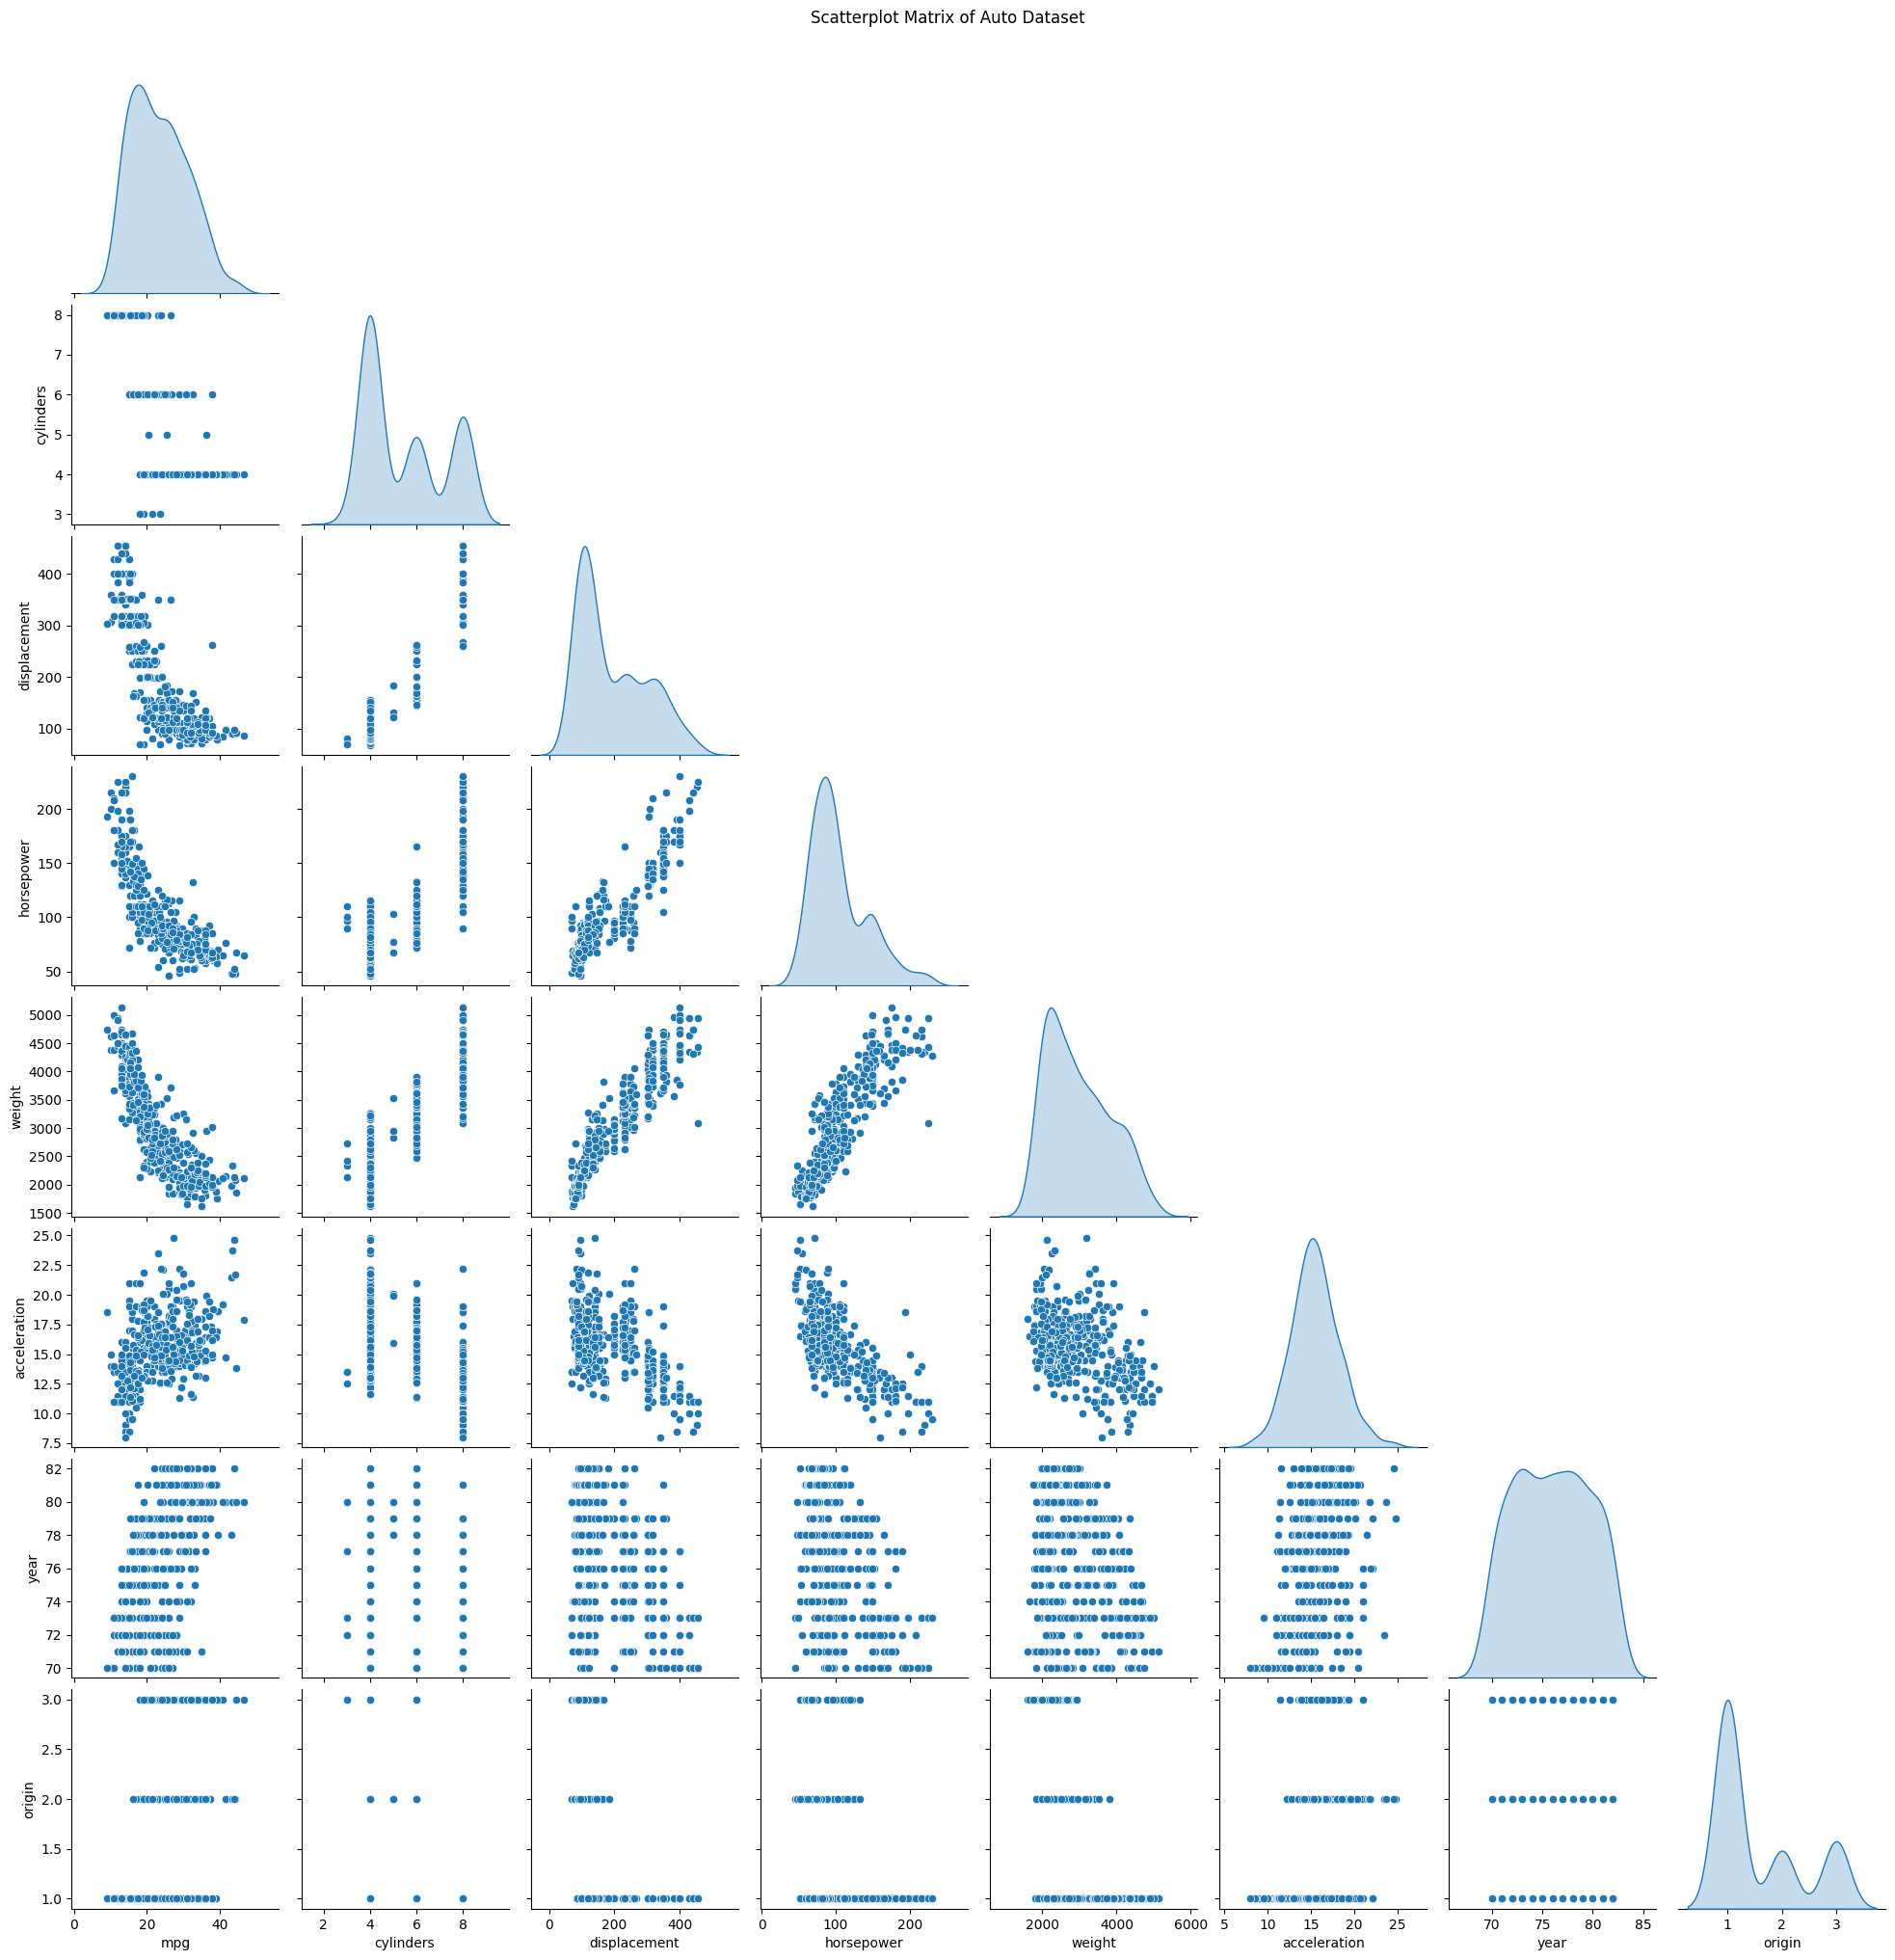

In [8]:
# Scatterplot matrix for all numeric variables
sns.pairplot(auto_numeric, diag_kind='kde', corner=True)
plt.suptitle("Scatterplot Matrix of Auto Dataset", y=1.02)
plt.show()

## 2. Quantitative correlation analysis

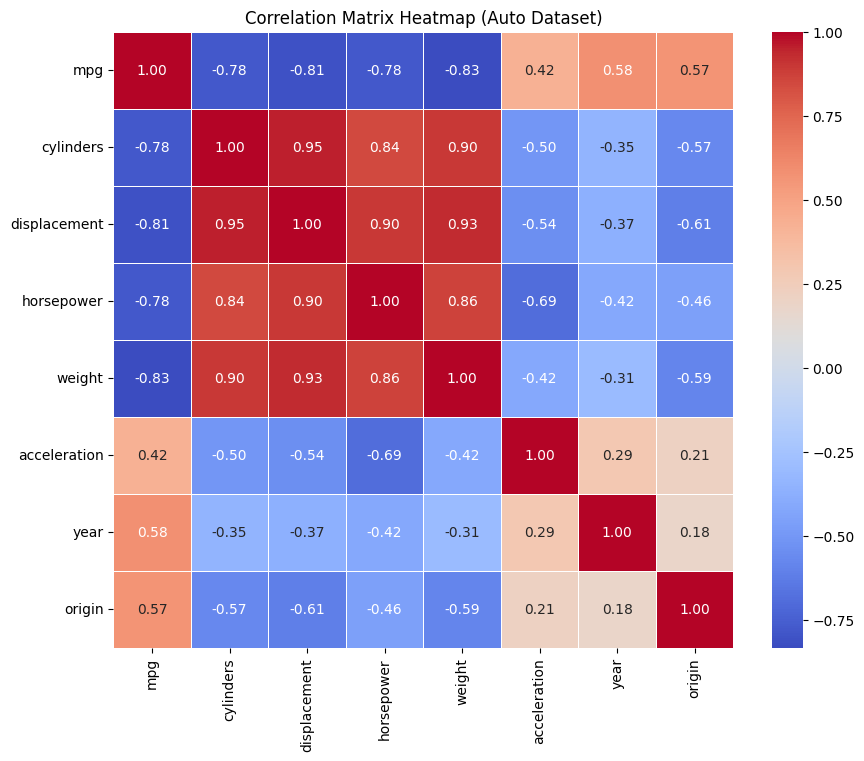

In [10]:
# Plot a heatmap of the correlation matrix
numeric_cols = auto_df.select_dtypes(include=['number']).columns
cor_matrix = auto_df[numeric_cols].corr()
# print("Correlation matrix (excluding 'name'):")
# print(cor_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap (Auto Dataset)")
plt.show()

## 3. Perform a multiple linear regression and give the summary of the results.

In [15]:
# Multiple linear regression: mpg as response, all other variables except 'name' as predictors

# Convert categorical variables to category dtype if needed
auto_df['origin'] = auto_df['origin'].astype('category')
auto_df['year'] = auto_df['year'].astype('category')
auto_df['cylinders'] = auto_df['cylinders'].astype('category')

# Fit the model
model = smf.ols('mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin', data=auto_df).fit()

print("Model Fitted.")
print(model.summary())

Model Fitted.
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     116.8
Date:                Mon, 15 Dec 2025   Prob (F-statistic):          2.64e-151
Time:                        23:52:42   Log-Likelihood:                -954.59
No. Observations:                 392   AIC:                             1955.
Df Residuals:                     369   BIC:                             2047.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           30.916

**i. Is there a relationship between the predictors and the response?**


**ii. Which predictors appear to have a statistically significant relationship to the response?**


**iii. What does the coefficient for the year variable suggest?**

## 4. Use the plot() function to produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

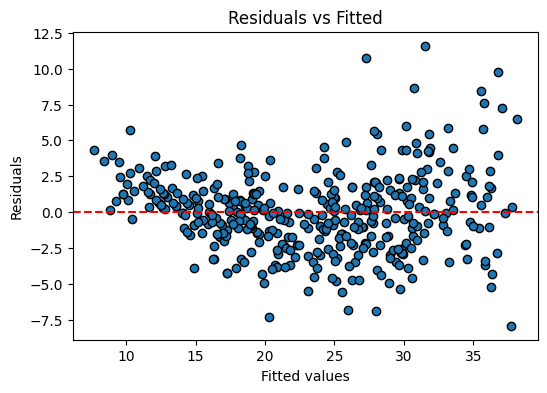

In [16]:
# Residuals vs Fitted
plt.figure(figsize=(6, 4))
plt.scatter(model.fittedvalues, model.resid, edgecolor='k')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()

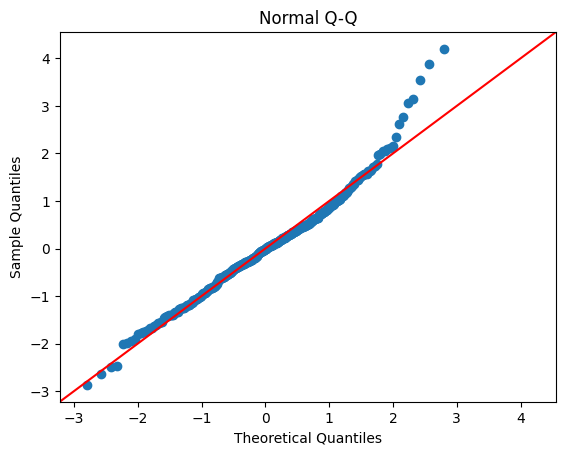

In [18]:
# Q-Q plot for normality of residuals
sm.qqplot(model.resid, line='45', fit=True)
plt.title('Normal Q-Q')
plt.show()

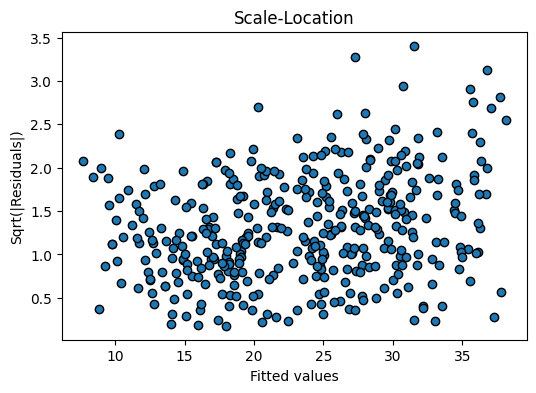

In [21]:
# Scale-Location plot (Spread of residuals)
plt.figure(figsize=(6, 4))
plt.scatter(model.fittedvalues, np.sqrt(np.abs(model.resid)), edgecolor='k')
plt.xlabel('Fitted values')
plt.ylabel('Sqrt(|Residuals|)')
plt.title('Scale-Location')
plt.show()

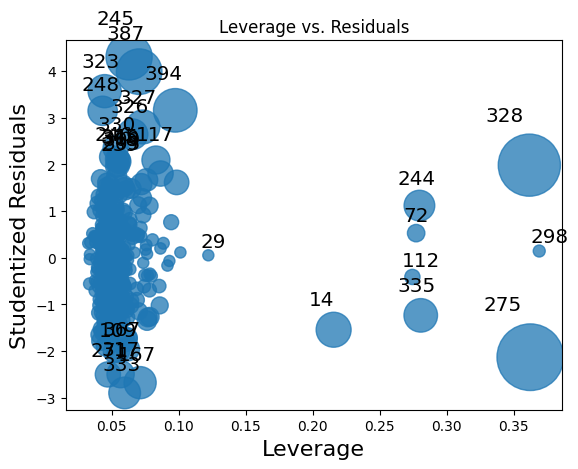

In [27]:
# Leverage plot
sm.graphics.influence_plot(model, criterion="cooks")
plt.title('Leverage vs. Residuals')
plt.show()

## 5. Use the * and : symbols to fit linear regression models with interaction effects. Do any interactions appear to be statistically significant?

In [ ]:
# Fit a model with interaction effects between displacement and weight, and year and origin
interaction_model = smf.ols('mpg ~ cylinders + displacement * weight + horsepower + acceleration + year * origin', data=auto_df).fit()

print("Interaction Model Fitted.")# Try transformations: log, sqrt, and square for selected predictors

# Create transformed variables (avoid log(0) by adding a small constant if needed)
auto_df['log_weight'] = np.log(auto_df['weight'])
auto_df['sqrt_horsepower'] = np.sqrt(auto_df['horsepower'])
auto_df['displacement2'] = auto_df['displacement'] ** 2

# Fit a model with transformed variables
trans_model = smf.ols('mpg ~ cylinders + displacement2 + sqrt_horsepower + log_weight + acceleration + year + origin', data=auto_df).fit()

print("Transformed Model Fitted.")
print(trans_model.summary())# Try transformations: log, sqrt, and square for selected predictors

# Create transformed variables (avoid log(0) by adding a small constant if needed)
auto_df['log_weight'] = np.log(auto_df['weight'])
auto_df['sqrt_horsepower'] = np.sqrt(auto_df['horsepower'])
auto_df['displacement2'] = auto_df['displacement'] ** 2

# Fit a model with transformed variables
trans_model = smf.ols('mpg ~ cylinders + displacement2 + sqrt_horsepower + log_weight + acceleration + year + origin', data=auto_df).fit()

print("Transformed Model Fitted.")
print(trans_model.summary())
print(interaction_model.summary())

Interaction Model Fitted.
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     73.11
Date:                Tue, 16 Dec 2025   Prob (F-statistic):          1.75e-151
Time:                        00:01:46   Log-Likelihood:                -891.41
No. Observations:                 392   AIC:                             1879.
Df Residuals:                     344   BIC:                             2069.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

## 6. Try a few different transformations of the variables, such as log(X),√X,X2. Comment on your findings.

In [29]:
# Try transformations: log, sqrt, and square for selected predictors

# Create transformed variables (avoid log(0) by adding a small constant if needed)
auto_df['log_weight'] = np.log(auto_df['weight'])
auto_df['sqrt_horsepower'] = np.sqrt(auto_df['horsepower'])
auto_df['displacement2'] = auto_df['displacement'] ** 2

# Fit a model with transformed variables
trans_model = smf.ols('mpg ~ cylinders + displacement2 + sqrt_horsepower + log_weight + acceleration + year + origin', data=auto_df).fit()

print("Transformed Model Fitted.")
print(trans_model.summary())

Transformed Model Fitted.
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     140.6
Date:                Tue, 16 Dec 2025   Prob (F-statistic):          2.27e-164
Time:                        00:03:11   Log-Likelihood:                -922.40
No. Observations:                 392   AIC:                             1891.
Df Residuals:                     369   BIC:                             1982.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept     

# Problem 9

In this exercise, we will predict the number of applications received using the other variables in the `College` data set

Get the data

In [2]:
# Load the College dataset from ISLR package
# ro.r['data']('College', package='ISLR')

# with localconverter(ro.default_converter + pandas2ri.converter):
#     college_df = ro.r['College']

# print(college_df.head())

# Save dataframe to csv
# college_df.to_csv('./datasets/college_data.csv', index=False)

# Load the College csv dataset
college_df = pd.read_csv('./datasets/college_data.csv')
# Rename columns to replace dots with underscores for valid Python identifiers
college_df.rename(columns=lambda x: x.replace('.', '_'), inplace=True)

college_df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate
0,Yes,1660.0,1232.0,721.0,23.0,52.0,2885.0,537.0,7440.0,3300.0,450.0,2200.0,70.0,78.0,18.1,12.0,7041.0,60.0
1,Yes,2186.0,1924.0,512.0,16.0,29.0,2683.0,1227.0,12280.0,6450.0,750.0,1500.0,29.0,30.0,12.2,16.0,10527.0,56.0
2,Yes,1428.0,1097.0,336.0,22.0,50.0,1036.0,99.0,11250.0,3750.0,400.0,1165.0,53.0,66.0,12.9,30.0,8735.0,54.0
3,Yes,417.0,349.0,137.0,60.0,89.0,510.0,63.0,12960.0,5450.0,450.0,875.0,92.0,97.0,7.7,37.0,19016.0,59.0
4,Yes,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,4120.0,800.0,1500.0,76.0,72.0,11.9,2.0,10922.0,15.0


### Understanding the College Dataset

The `College` dataset from the ISLR package contains information on 777 U.S. colleges and universities, sourced from the Carnegie Mellon University survey. It is used to predict the number of applications received (`Apps`) based on various institutional characteristics.

#### Key Variables and Their Meanings:
- **Apps**: Number of applications received (response variable; quantitative).
- **Accept**: Number of applicants accepted (quantitative).
- **Enroll**: Number of new students enrolled (quantitative).
- **Top10perc**: Percentage of new students from top 10% of high school class (quantitative).
- **Top25perc**: Percentage of new students from top 25% of high school class (quantitative).
- **F_Undergrad**: Number of full-time undergraduates (quantitative).
- **P_Undergrad**: Number of part-time undergraduates (quantitative).
- **Outstate**: Out-of-state tuition (quantitative).
- **Room_Board**: Room and board costs (quantitative).
- **Books**: Estimated book costs (quantitative).
- **Personal**: Estimated personal spending (quantitative).
- **PhD**: Percentage of faculty with Ph.D.'s (quantitative).
- **Terminal**: Percentage of faculty with terminal degree (quantitative).
- **S_F_Ratio**: Student/faculty ratio (quantitative).
- **perc_alumni**: Percentage of alumni who donate (quantitative).
- **Expend**: Instructional expenditure per student (quantitative).
- **Grad_Rate**: Graduation rate (quantitative).
- **Private**: Whether the college is private (categorical: Yes/No).

This dataset helps analyze factors influencing college applications, such as prestige, cost, and academic quality. All monetary values are in dollars, and percentages are out of 100. The data is observational, not experimental, so correlations do not imply causation. For more details, refer to the ISLR documentation or the original survey.

## Explore the data

In [3]:
college_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    float64
 2   Accept       777 non-null    float64
 3   Enroll       777 non-null    float64
 4   Top10perc    777 non-null    float64
 5   Top25perc    777 non-null    float64
 6   F_Undergrad  777 non-null    float64
 7   P_Undergrad  777 non-null    float64
 8   Outstate     777 non-null    float64
 9   Room_Board   777 non-null    float64
 10  Books        777 non-null    float64
 11  Personal     777 non-null    float64
 12  PhD          777 non-null    float64
 13  Terminal     777 non-null    float64
 14  S_F_Ratio    777 non-null    float64
 15  perc_alumni  777 non-null    float64
 16  Expend       777 non-null    float64
 17  Grad_Rate    777 non-null    float64
dtypes: float64(17), object(1)
memory usage: 109.4+ KB


### Why Use Preprocessing Instances?

Preprocessing is essential for preparing the `College` dataset for machine learning models, as it handles mixed data types and ensures fair treatment of features. The `preprocess` and `preprocess_dense` instances from `ColumnTransformer` address this:

- **Categorical Encoding**: The `Private` column (categorical) is one-hot encoded using `OneHotEncoder(drop="first")` to convert it into binary indicators (e.g., 0 for "No", 1 for "Yes"). This avoids issues with non-numeric data in regression models like OLS, Ridge, and Lasso, which require numeric inputs.

- **Numeric Scaling**: Numeric columns (e.g., `Apps`, `Accept`) are standardized with `StandardScaler` to have mean 0 and variance 1. This is crucial for regularization methods (Ridge, Lasso) to prevent features with larger scales (e.g., `Expend`) from dominating the model, ensuring balanced coefficient penalties.

- **Dense Transformation for PCA/PLS**: `preprocess_dense` uses `OneHotEncoder(sparse_output=False)` and `FunctionTransformer` to create a dense matrix, required for PCA-based methods (PCR, PLS) that need dense arrays. Scaling is applied afterward for consistency.

Without preprocessing, models could produce biased results, fail to converge, or ignore categorical variables. These steps standardize the pipeline for training and testing, improving model performance and interpretability. For example, in Ridge/Lasso, unscaled features might lead to suboptimal regularization, while PCA requires dense, scaled data for accurate principal components.

## 1. Split the data set into a training set and a test set.

In [31]:
# Split the data set into a training set and a test set.
from sklearn.model_selection import train_test_split    

X_train, X_test, y_train, y_test = train_test_split(college_df.drop(columns=['Apps']), college_df['Apps'], test_size=0.2, random_state=42)

print("Data split into training and test sets.")

Data split into training and test sets.


Plot the quantitative variables

In [32]:
# infer categorical / numeric columns from the actual training frame (X_train must exist)
cat_cols = [c for c in X_train.columns if X_train[c].dtype == "object" or str(X_train[c].dtype).startswith("category")]
num_cols = [c for c in X_train.columns if c not in cat_cols]

print("Using categorical columns:", cat_cols)
print("Using numeric columns:", num_cols)

Using categorical columns: ['Private']
Using numeric columns: ['Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F_Undergrad', 'P_Undergrad', 'Outstate', 'Room_Board', 'Books', 'Personal', 'PhD', 'Terminal', 'S_F_Ratio', 'perc_alumni', 'Expend', 'Grad_Rate']


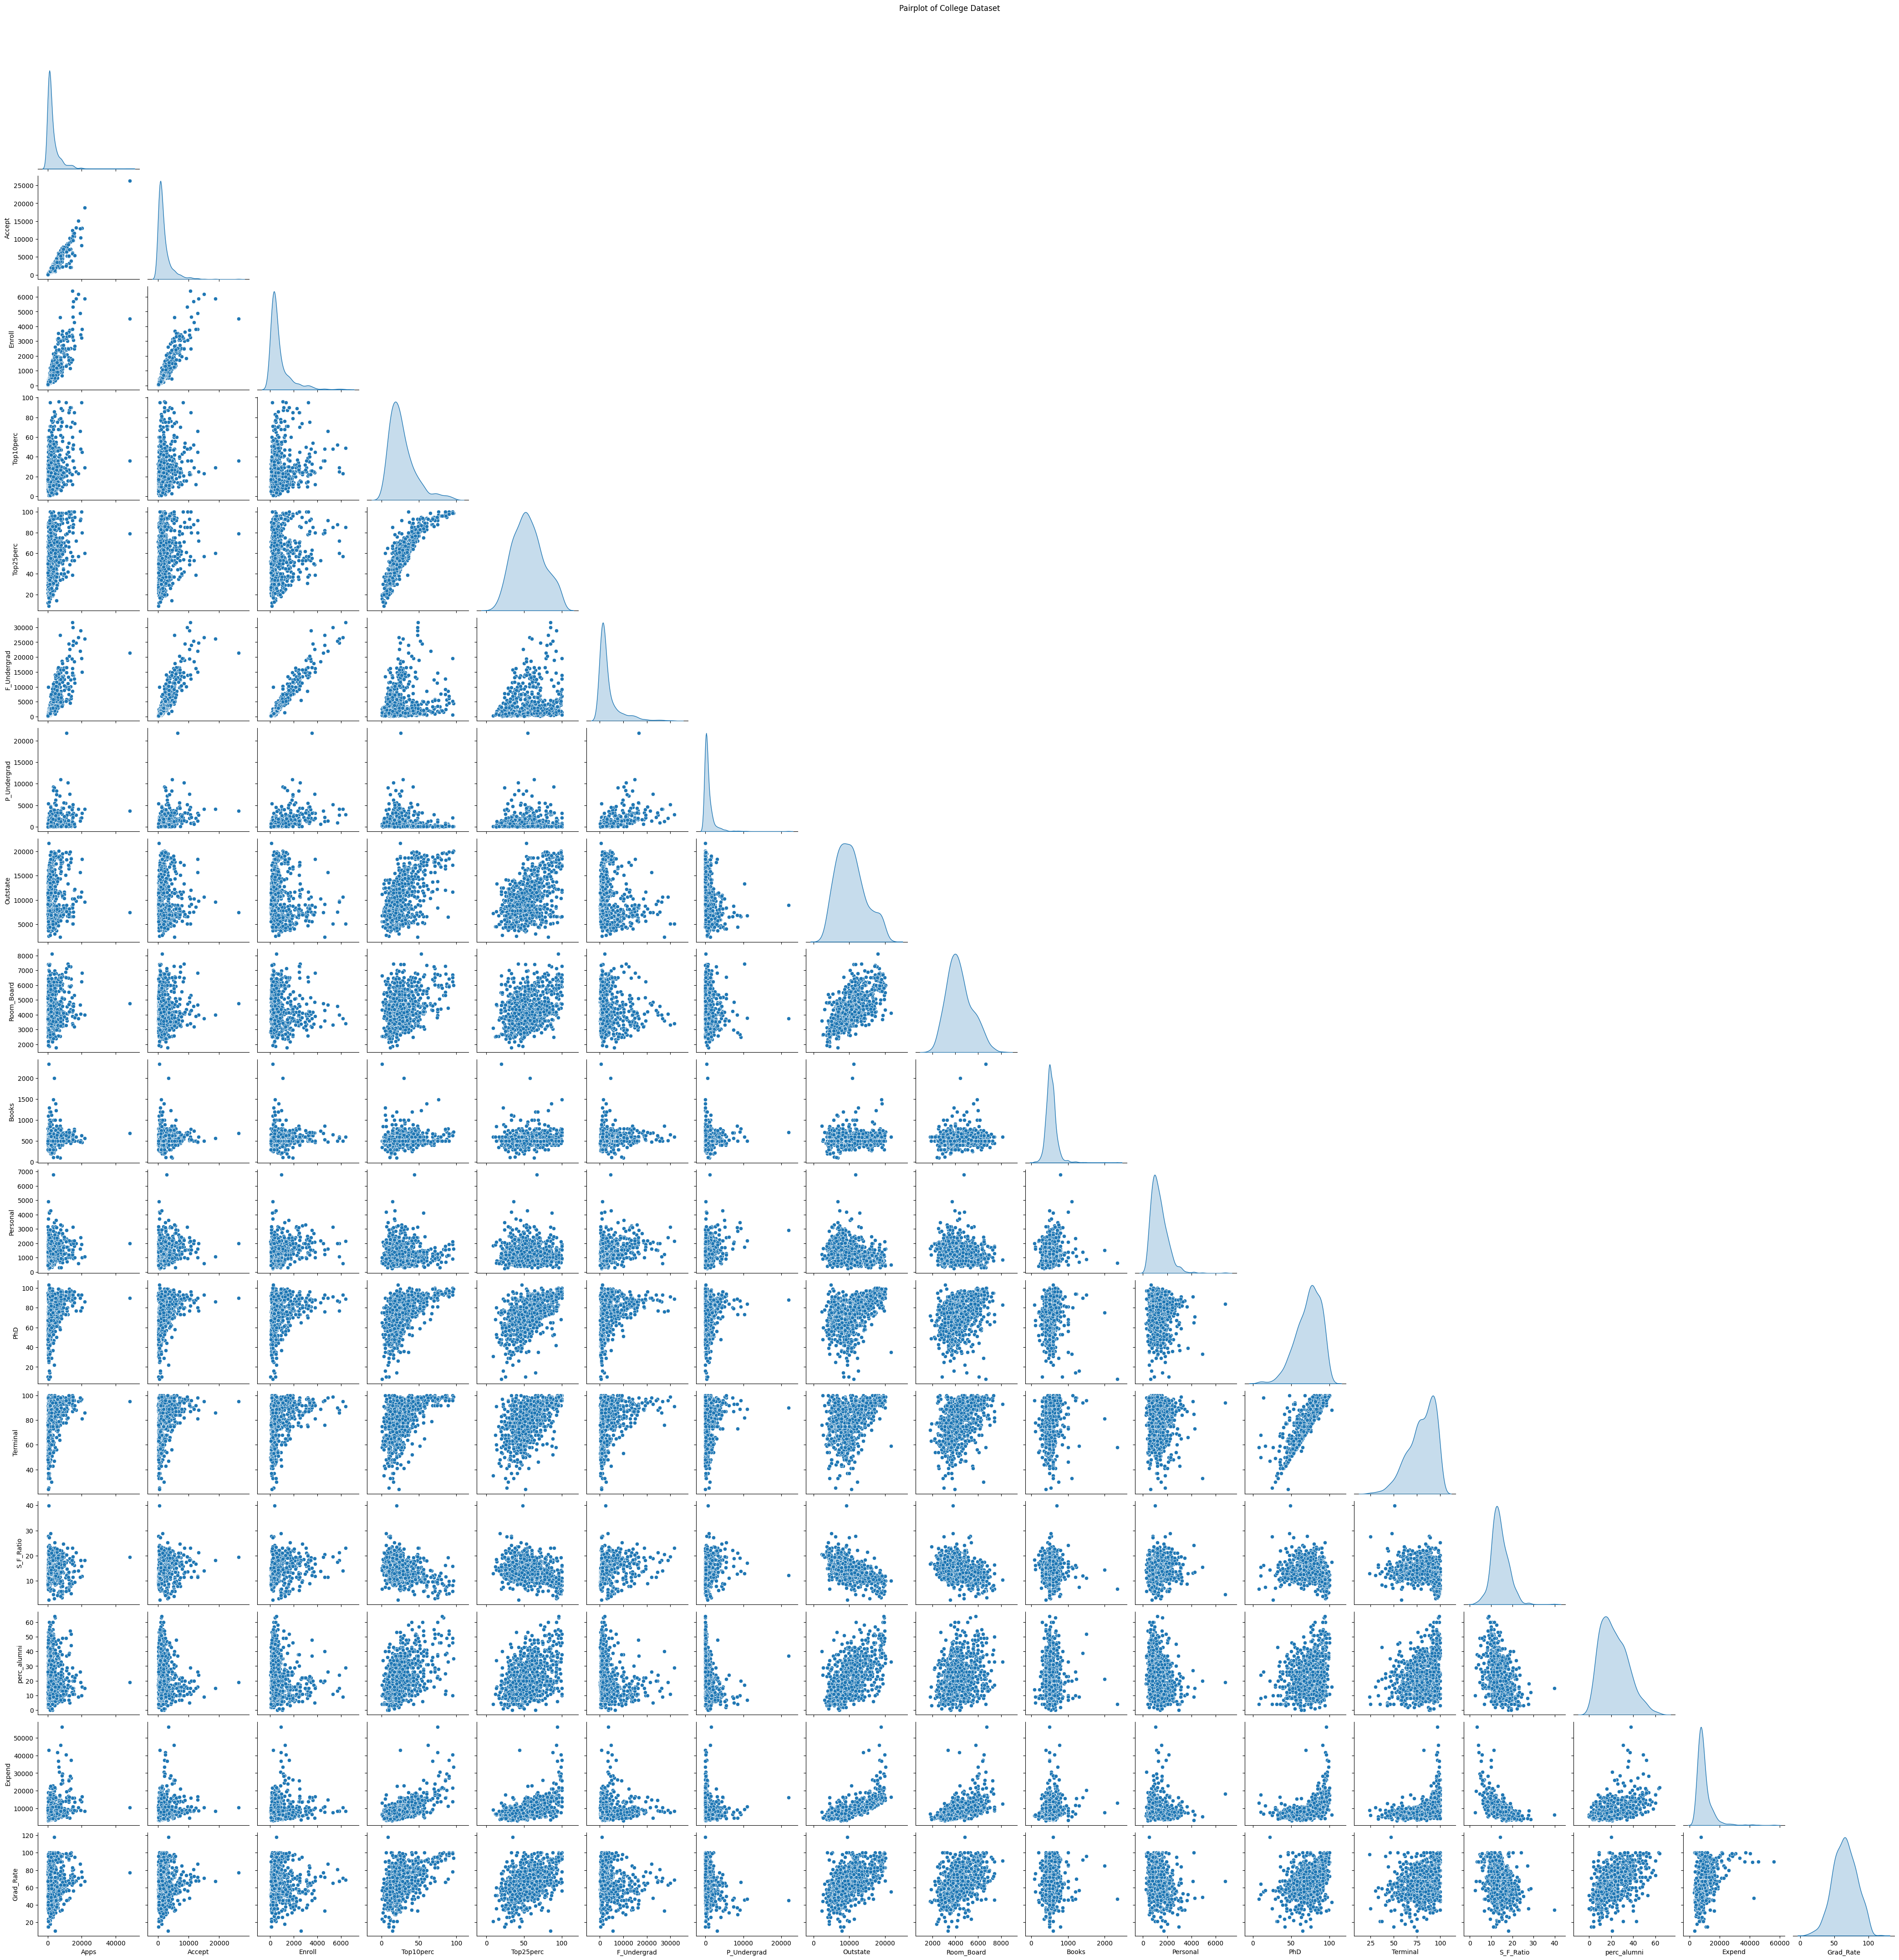

In [ ]:
sns.pairplot(college_df[num_cols], diag_kind='kde', corner=True)
plt.suptitle("Pairplot of College Dataset", y=1.02)
plt.show()

Data preprocessing and scaling instances

In [15]:
# inspector
X_train

,Private,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate
2,Yes,1097.0,336.0,22.0,50.0,1036.0,99.0,11250.0,3750.0,400.0,1165.0,53.0,66.0,12.9,30.0,8735.0,54.0
3,Yes,349.0,137.0,60.0,89.0,510.0,63.0,12960.0,5450.0,450.0,875.0,92.0,97.0,7.7,37.0,19016.0,59.0
9,Yes,498.0,172.0,21.0,44.0,799.0,78.0,10468.0,3380.0,660.0,1800.0,40.0,41.0,11.5,15.0,8991.0,52.0
10,Yes,1425.0,472.0,37.0,75.0,1830.0,110.0,16548.0,5406.0,500.0,600.0,82.0,88.0,11.3,31.0,10932.0,73.0
12,Yes,780.0,290.0,38.0,64.0,1130.0,638.0,9690.0,4785.0,600.0,1000.0,60.0,84.0,13.3,21.0,7940.0,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,No,1805.0,769.0,24.0,61.0,3395.0,670.0,6400.0,3392.0,580.0,2150.0,71.0,80.0,12.8,26.0,6729.0,59.0
768,Yes,128.0,75.0,17.0,41.0,282.0,22.0,9100.0,3700.0,500.0,1400.0,48.0,48.0,8.5,26.0,8960.0,50.0
770,Yes,935.0,273.0,51.0,83.0,1059.0,34.0,12680.0,4150.0,605.0,1440.0,91.0,92.0,15.3,42.0,7875.0,75.0
771,Yes,2314.0,682.0,49.0,86.0,2802.0,86.0,15884.0,5370.0,530.0,730.0,92.0,94.0,15.2,34.0,10774.0,82.0


Scler Instances

In [ ]:
# prepressing instances
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer

preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_cols) if cat_cols else ("cat", "passthrough", []),
        ("num", StandardScaler(), num_cols) if num_cols else ("num", "passthrough", []),
    ]
)

preprocess_dense = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore"), cat_cols) if cat_cols else ("cat", "passthrough", []),
        ("num", FunctionTransformer(lambda x: x), num_cols) if num_cols else ("num", "passthrough", []),
    ],
    sparse_threshold=0
)

Using categorical columns: ['Private']
Using numeric columns: ['Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F_Undergrad', 'P_Undergrad', 'Outstate', 'Room_Board', 'Books', 'Personal', 'PhD', 'Terminal', 'S_F_Ratio', 'perc_alumni', 'Expend', 'Grad_Rate']


### 1. OLS / Ridge / Lasso preprocessing

**(One-hot encode categoricals + scale numeric features)**

**Mathematical form**

Let the dataset be split into:

Categorical features: $X^{(cat)}$

Numerical features: $X^{(num)}$

**One-hot encoding (drop first level):**

$$ \widetilde{X}^{(cat)} = \text{OneHot}(X^{(cat)}) $$

**Standard scaling of numeric features:**

$$ \widetilde{X}^{(num)} = \text{Scale}(X^{(num)}) $$

**Final design matrix:**

$$ \widetilde{X} = \left[\widetilde{X}^{(cat)} \mid \widetilde{X}^{(num)}\right] $$

### 2. PCR / PLS preprocessing

**(One-hot encode categoricals + scale numeric features)**

**Mathematical form**

**One-hot encoding (dense):**

$$ \widetilde{X}^{(cat)} = \text{OneHot}_{dense}(X^{(cat)}) $$

**Combine features (no scaling yet):**

$$ X^{*} = \left[\widetilde{X}^{(cat)} \mid X^{(num)}\right] $$

**Scale all columns:**

$$ X = \frac{X^{*} - \mu_{X^{*}}}{\sigma_{X^{*}}} $$

## 2. Fit a linear model using least squares on the training set, and report the test error obtained.

In [ ]:
# fit OSL (Ordinary Least Squares)
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from typing import Dict

# results dictionary to store results
results: Dict[str, Dict[str, float]] = {}

# OLS
ols = Pipeline([
    ("preprocess", preprocess),
    ("model", LinearRegression())
])
ols.fit(X_train, y_train)
pred = ols.predict(X_test)
mse_ols = mean_squared_error(y_test, pred)
results["OLS"] = {"test_mse": mse_ols, "test_rmse": np.sqrt(mse_ols)}

**Simplifying the Linear Regression Model Fitting and Test MSE Calculation**

The code in the cell above performs the following steps to fit a linear regression model on the training set and evaluate it on the test set:

1. **Identify Predictors**: Create a list of all columns in `college_train` except 'Apps' (the response variable) to use as predictors.

2. **Build Formula**: Construct a formula string for the OLS model, e.g., `'Apps ~ Private + Accept + ...'`, by joining the predictor names with ' + '.

3. **Fit the Model**: Use `smf.ols()` to fit the linear model on the training data (`college_train`) using the built formula.

4. **Make Predictions**: Predict the 'Apps' values for the test set (`college_test`) using the fitted model.

5. **Compute Test MSE**: Calculate the Mean Squared Error (MSE) between the actual 'Apps' in the test set and the predicted values, then print it.

This approach uses all available predictors for a basic linear regression. The test MSE of approximately 1,713,746 indicates the average squared prediction error on unseen data. For simplification, consider using fewer predictors or regularization if overfitting is suspected.

## 3. Fit a ridge regression model on the training set, with λ chosen by cross-validation. Report the test error obtained.

In [21]:
# Ridge Regression with hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold

# 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=1)

ridge = Pipeline([
    ("preprocess", preprocess),
    ("model", Ridge())
])
alphas_ridge = np.logspace(-2, 6, 100)

ridge_gs = GridSearchCV(
    ridge,
    param_grid={"model__alpha": alphas_ridge},
    cv=cv,
    scoring="neg_mean_squared_error"
)
ridge_gs.fit(X_train, y_train)
mse_ridge = mean_squared_error(y_test, ridge_gs.predict(X_test))
results["Ridge"] = {
    "best_lambda": ridge_gs.best_params_["model__alpha"],
    "test_mse": mse_ridge,
    "test_rmse": np.sqrt(mse_ridge),
}

**Simplifying Linear Regression and Test Error**

The code above does these simple steps to build and test a linear regression model:

1. **Pick Predictors**: List all columns in the training data except 'Apps' (the thing we're predicting).

2. **Make a Formula**: Create a string like `Apps ~ Private + Accept + ...` by adding up the predictor names.

3. **Train the Model**: Use the formula to fit a linear model on the training data.

4. **Predict on Test Data**: Use the trained model to guess 'Apps' values for the test set.

5. **Check Accuracy**: Calculate the Mean Squared Error (MSE) by comparing real and predicted 'Apps', then show it.

This uses all predictors for a basic model. The test MSE around 1,713,746 shows average prediction error on new data. To improve, try fewer predictors or add penalties if the model is too complex.

In [28]:
# examine results
results['Ridge']

{'best_lambda': np.float64(2.2051307399030455),
 'test_mse': 1804485.707131104,
 'test_rmse': np.float64(1343.3114706318502)}

## 3. Fit a lasso model on the training set, with λ chosen by cross validation. Report the test error obtained, along with the number of non-zero coefficient estimates.

In [22]:
from sklearn.linear_model import Lasso

lasso = Pipeline([
    ("preprocess", preprocess),
    ("model", Lasso(max_iter=200000))
])
alphas_lasso = np.logspace(-2, 4, 120)

lasso_gs = GridSearchCV(
    lasso,
    param_grid={"model__alpha": alphas_lasso},
    cv=cv,
    scoring="neg_mean_squared_error"
)
lasso_gs.fit(X_train, y_train)

best_lasso = lasso_gs.best_estimator_
mse_lasso = mean_squared_error(y_test, best_lasso.predict(X_test))
nonzero = int(np.sum(best_lasso.named_steps["model"].coef_ != 0))

results["Lasso"] = {
    "best_lambda": lasso_gs.best_params_["model__alpha"],
    "test_mse": mse_lasso,
    "test_rmse": np.sqrt(mse_lasso),
    "nonzero_coefs": nonzero,
}

## 5. Fit a PCR model on the training set, with M chosen by cross validation. Report the test error obtained, along with the value of M selected by cross-validation.

In [26]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.decomposition import PCA

n_features = X_train.shape[1]

# pls
pcr = Pipeline([
    ("preprocess", preprocess_dense),
    ("scale", StandardScaler()),
    ("pca", PCA()),
    ("model", LinearRegression())
])

pcr_gs = GridSearchCV(
    pcr,
    param_grid={"pca__n_components": list(range(1, n_features + 1))},
    cv=cv,
    scoring="neg_mean_squared_error"
)
pcr_gs.fit(X_train, y_train)
mse_pcr = mean_squared_error(y_test, pcr_gs.predict(X_test))

results["PCR"] = {
    "best_M": pcr_gs.best_params_["pca__n_components"],
    "test_mse": mse_pcr,
    "test_rmse": np.sqrt(mse_pcr),
}


## 6. Fit a PLS model on the training set, with M chosen by cross validation. Report the test error obtained, along with the value of M selected by cross-validation

In [24]:
pls = Pipeline([
    ("preprocess", preprocess_dense),
    ("scale", StandardScaler()),
    ("model", PLSRegression())
])

pls_gs = GridSearchCV(
    pls,
    param_grid={"model__n_components": list(range(1, n_features + 1))},
    cv=cv,
    scoring="neg_mean_squared_error"
)
pls_gs.fit(X_train, y_train)
mse_pls = mean_squared_error(y_test, pls_gs.predict(X_test).ravel())

results["PLS"] = {
    "best_M": pls_gs.best_params_["model__n_components"],
    "test_mse": mse_pls,
    "test_rmse": np.sqrt(mse_pls),
}

## 7. Comment on the results obtained. How accurately can we predict the number of college applications received? Is there much difference among the test errors resulting from these five approaches?

In [27]:
# comment on results
print("Train size:", X_train.shape[0], "| Test size:", X_test.shape[0])
print("\n=== Test Errors (lower is better) ===")
for k, v in results.items():
    extra = []
    if "best_lambda" in v: extra.append(f"lambda={v['best_lambda']:.6g}")
    if "best_M" in v: extra.append(f"M={v['best_M']}")
    if "nonzero_coefs" in v: extra.append(f"nonzero={v['nonzero_coefs']}")
    extra_str = (" | " + ", ".join(extra)) if extra else ""
    print(f"{k:5s}: MSE={v['test_mse']:.3f} | RMSE={v['test_rmse']:.3f}{extra_str}")

Train size: 408 | Test size: 369

=== Test Errors (lower is better) ===
OLS  : MSE=1713746.141 | RMSE=1309.101
Ridge: MSE=1804485.707 | RMSE=1343.311 | lambda=2.20513
Lasso: MSE=1775160.799 | RMSE=1332.352 | lambda=7.48083, nonzero=15
PLS  : MSE=1713751.430 | RMSE=1309.103 | M=13
PCR  : MSE=1713746.141 | RMSE=1309.101 | M=17
